# Image Histogram

# Grayscale Histogram

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils

In [2]:
def plt_imshow(title,image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.axis("on")
    plt.show()

In [3]:
image=cv2.imread("Images/beach.png")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

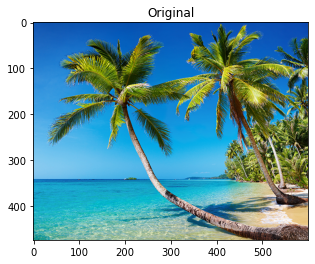

In [4]:
plt_imshow("Original",image)

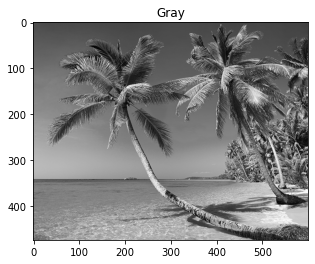

In [5]:
plt_imshow("Gray",gray)

In [6]:
hist=cv2.calcHist([gray],[0],None,[256],[0,256])
normalize_hist=hist/hist.sum()

(0.0, 256.0)

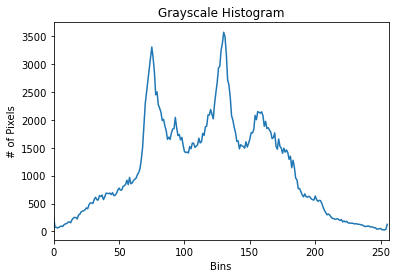

In [7]:
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0,256])


(0.0, 256.0)

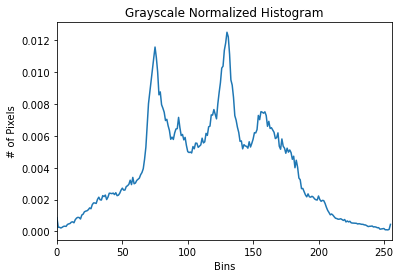

In [8]:
plt.figure()
plt.title("Grayscale Normalized Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(normalize_hist)
plt.xlim([0,256])

# Histogram

In [9]:
def plot_histogram(title,image,mask=None):
    chans=cv2.split(image)
    colors=("b","g","r")
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    
    for (chan,color) in zip(chans,colors):
        hist=cv2.calcHist([chan],[0],mask,[256],[0,256])
        plt.plot(hist,color=color)
        plt.xlim([0,256])
        
    
    

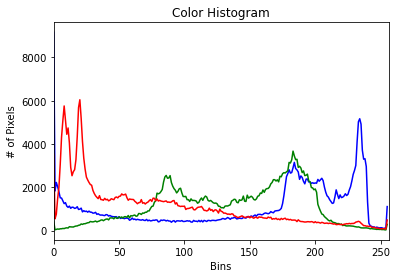

In [10]:
plot_histogram("Color Histogram",image)

# Histogram with Mask

In [11]:
(h,w,c)=image.shape[:]

In [12]:
mask=np.zeros((h,w),dtype="uint8")

In [13]:
mask=cv2.rectangle(mask,(50,300),(200,400),255,-1)

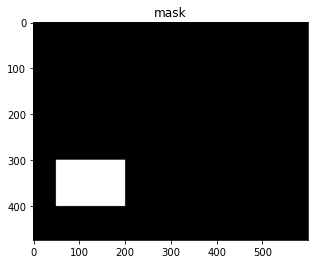

In [14]:
plt_imshow("mask",mask)

In [15]:
masked=cv2.bitwise_and(image,image,mask=mask)

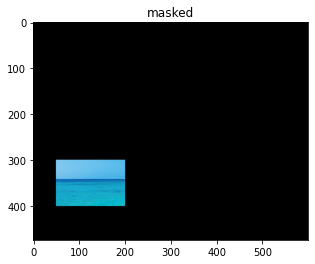

In [16]:
plt_imshow("masked",masked)

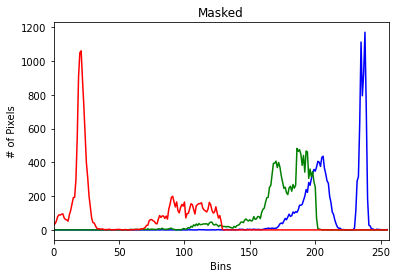

In [17]:
plot_histogram("Masked",image,mask)


# 2D Histogram

2D histogram shape: (32, 32), with 1024 values


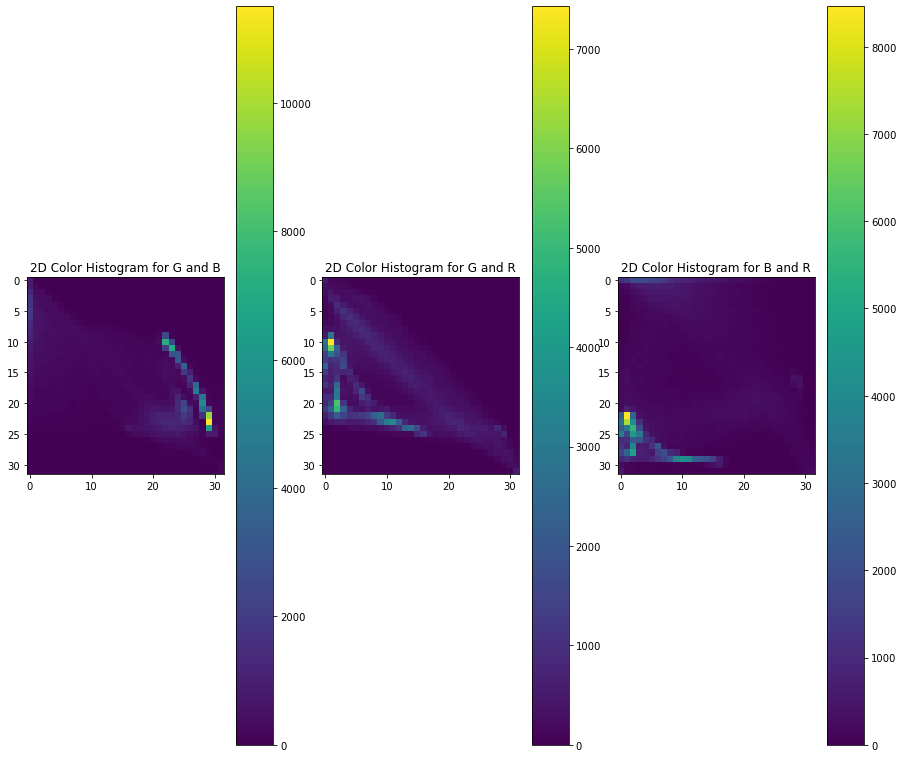

In [22]:
# create a new figure and then plot a 2D color histogram for the
# green and blue channels

chans=cv2.split(image)

fig = plt.figure(figsize=(15, 25))
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)

# plot a 2D color histogram for the green and red channels
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

# plot a 2D color histogram for blue and red channels
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)

# finally, let's examine the dimensionality of one of the 2D
# histograms
print("2D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0]))

# 3D

In [23]:
# our 2D histogram could only take into account 2 out of the 3
# channels in the image so now let's build a 3D color histogram
# (utilizing all channels) with 8 bins in each direction -- we
# can't plot the 3D histogram, but the theory is exactly like
# that of a 2D histogram, so we'll just show the shape of the
# histogram
hist = cv2.calcHist([image], [0, 1, 2],
	None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0])) 


3D histogram shape: (8, 8, 8), with 512 values


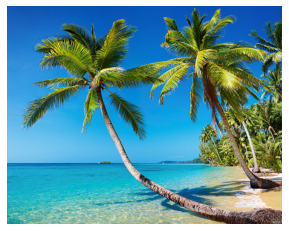

In [24]:
# display the original input image
plt.figure()
plt.axis("off")
plt.imshow(imutils.opencv2matplotlib(image))

# show our plots
plt.show()

# Histogram Equalization

## Basic Histogram Equalization

In [36]:
image=cv2.imread("Images/car_plate.jpg")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
equalized=cv2.equalizeHist(gray)

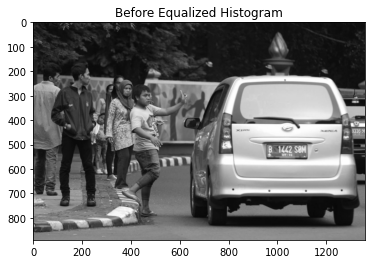

In [37]:
plt_imshow("Before Equalized Histogram",gray)

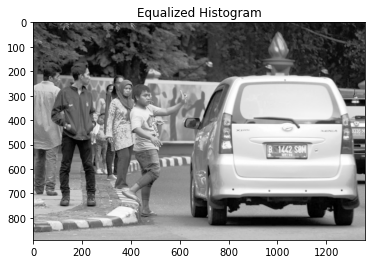

In [40]:
plt_imshow("Equalized Histogram",equalized)

In [42]:
image=cv2.imread("Images/person-woman-sun-light.jpg")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
equalized=cv2.equalizeHist(gray)

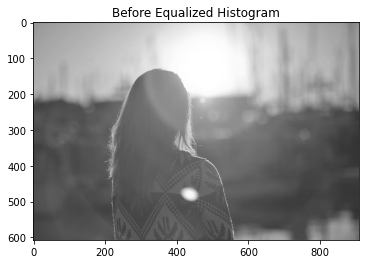

In [43]:
plt_imshow("Before Equalized Histogram",gray)

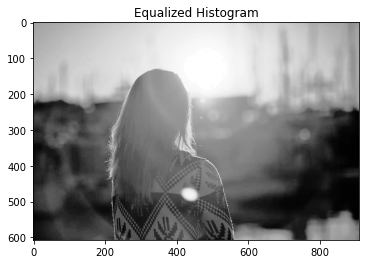

In [45]:
plt_imshow("Equalized Histogram",equalized)

#We can see the sun is not correct, that's why we need adaptive

## CLAHE (Contrast Limited Adaptive Histogram Equalization)

In [63]:
# Create Clahe

# Clip will limit the noise so it not being boosted
# Gridsize, CLAHE will apply histogram equalization to 8x8 tile then combine, if tile too small, it can boost the noise

clahe=cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))

# Recommended clipLimit (2.0 - 4.0)
# Recommended gridsize (4 - 10)

In [61]:
equalized=clahe.apply(gray)

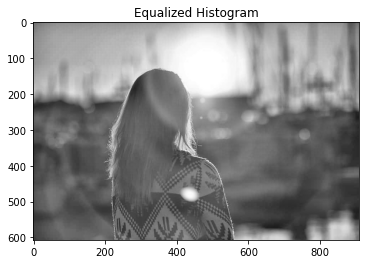

In [62]:
plt_imshow("Equalized Histogram",equalized)

#See the picture is more correct using CLAHE

# Histogram Matching


In [81]:
from skimage import exposure

In [82]:
images_ref=cv2.imread("Images/empire_state_sunset.png")
image_target=cv2.imread("Images/empire_state_cloudy.png")

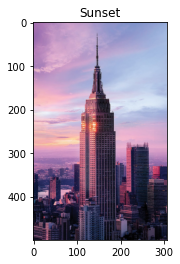

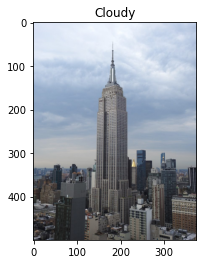

In [83]:
plt_imshow("Sunset",images_ref)
plt_imshow("Cloudy",image_target)


In [88]:
%%time
multi = True if image_target.shape[-1] > 1 else False
matched= exposure.match_histograms(image_target,images_ref,multichannel=multi)

Wall time: 34.9 ms


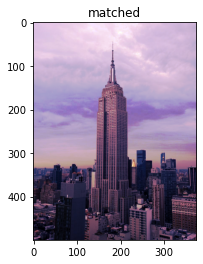

In [85]:
plt_imshow("matched",matched)

Text(0.5, 1.0, 'Matched')

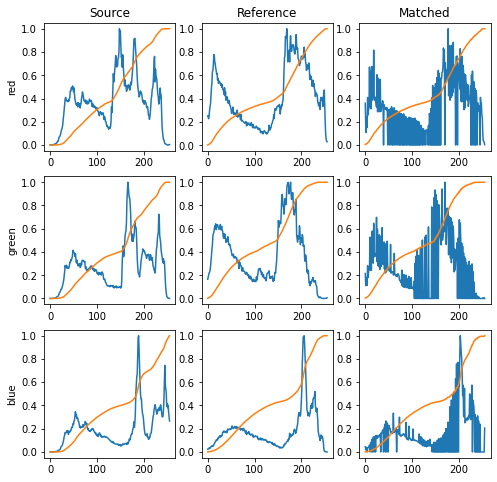

In [86]:
# construct a figure to display the histogram plots for each channel
# before and after histogram matching was applied
(fig, axs) =  plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

# loop over our source image, reference image, and output matched
# image
for (i, image) in enumerate((image_target, images_ref, matched)):
	# convert the image from BGR to RGB channel ordering
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

	# loop over the names of the channels in RGB order
	for (j, color) in enumerate(("red", "green", "blue")):
		# compute a histogram for the current channel and plot it
		(hist, bins) = exposure.histogram(image[..., j],
			source_range="dtype")
		axs[j, i].plot(bins, hist / hist.max())

		# compute the cumulative distribution function for the
		# current channel and plot it
		(cdf, bins) = exposure.cumulative_distribution(image[..., j])
		axs[j, i].plot(bins, cdf)

		# set the y-axis label of the current plot to be the name
		# of the current color channel
		axs[j, 0].set_ylabel(color)
  
# set the axes titles
axs[0, 0].set_title("Source")
axs[0, 1].set_title("Reference")
axs[0, 2].set_title("Matched")

# Gamma Correction

If the image not really appear, we can use gama correction

In [95]:
image=cv2.imread("Images/person-woman-sun-light.jpg")

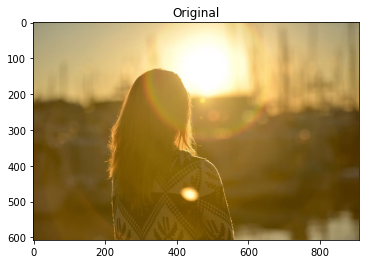

In [96]:
plt_imshow("Original",image)

In [103]:
def adjust_gamma(image,gamma=1.0):
    invGamma=1.0/gamma
    table= np.array([((i/255.0)**invGamma)*255 for i in np.arange(0,256)]).astype("uint8")
    
    print("Table", table)
    return cv2.LUT(image,table)

In [105]:
adjusted=adjust_gamma(image,1.5)

Table [  0   6  10  13  15  18  20  23  25  27  29  31  33  35  36  38  40  41
  43  45  46  48  49  51  52  54  55  57  58  59  61  62  63  65  66  67
  69  70  71  72  74  75  76  77  79  80  81  82  83  84  86  87  88  89
  90  91  92  93  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 132 133 134 135 136 137 138 139 140 141 142 142
 143 144 145 146 147 148 149 149 150 151 152 153 154 155 155 156 157 158
 159 160 161 161 162 163 164 165 166 166 167 168 169 170 170 171 172 173
 174 175 175 176 177 178 179 179 180 181 182 182 183 184 185 186 186 187
 188 189 189 190 191 192 193 193 194 195 196 196 197 198 199 199 200 201
 202 202 203 204 205 205 206 207 208 208 209 210 211 211 212 213 213 214
 215 216 216 217 218 219 219 220 221 221 222 223 224 224 225 226 226 227
 228 228 229 230 231 231 232 233 233 234 235 235 236 237 238 238 239 240
 240 241 242 242 243 244 244 245 246 246 247 

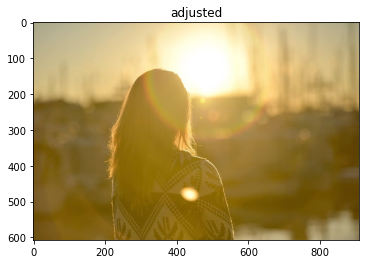

In [102]:
plt_imshow("adjusted",adjusted)

# Automatic Color Correction using Histogram Matching

 If color is important in detection or recognition, we need to stadardize all the color from input images using color matching.

In [106]:
from imutils.perspective import four_point_transform


In [107]:
def find_color_card(image):
	# load the ArUCo dictionary, grab the ArUCo parameters, and
	# detect the markers in the input image
	arucoDict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_ARUCO_ORIGINAL)
	arucoParams = cv2.aruco.DetectorParameters_create()
	(corners, ids, rejected) = cv2.aruco.detectMarkers(image,
		arucoDict, parameters=arucoParams)

	# try to extract the coordinates of the color correction card
	try:
		# otherwise, we've found the four ArUco markers, so we can
		# continue by flattening the ArUco IDs list
		ids = ids.flatten()

		# extract the top-left marker
		i = np.squeeze(np.where(ids == 923))
		topLeft = np.squeeze(corners[i])[0]

		# extract the top-right marker
		i = np.squeeze(np.where(ids == 1001))
		topRight = np.squeeze(corners[i])[1]

		# extract the bottom-right marker
		i = np.squeeze(np.where(ids == 241))
		bottomRight = np.squeeze(corners[i])[2]

		# extract the bottom-left marker
		i = np.squeeze(np.where(ids == 1007))
		bottomLeft = np.squeeze(corners[i])[3]

	# we could not find color correction card, so gracefully return
	except:
		return None

	# build our list of reference points and apply a perspective
	# transform to obtain a top-down, birds-eye-view of the color
	# matching card
	cardCoords = np.array([topLeft, topRight,
		bottomRight, bottomLeft])
	card = four_point_transform(image, cardCoords)

	# return the color matching card to the calling function
	return card

[INFO] loading images...


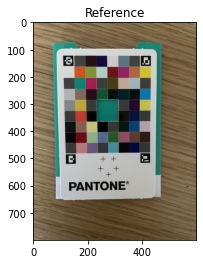

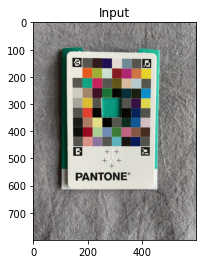

In [108]:
# load the reference image and input images from disk
print("[INFO] loading images...")
ref = cv2.imread("Images/reference.jpg")
image = cv2.imread("Images/03.jpg")

# resize the reference and input images
ref = imutils.resize(ref, width=600)
image = imutils.resize(image, width=600)

# display the reference and input images to our screen
plt_imshow("Reference", ref)
plt_imshow("Input", image)

[INFO] finding color matching cards...


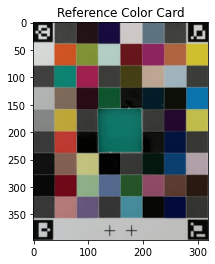

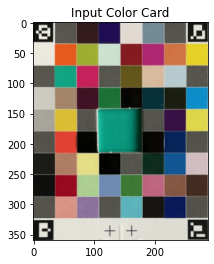

[INFO] matching images...


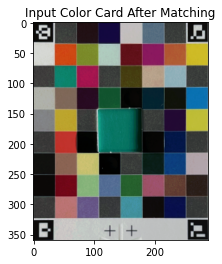

In [109]:

# find the color matching card in each image
print("[INFO] finding color matching cards...")
refCard = find_color_card(ref)
imageCard = find_color_card(image)

# if the color matching card is not found in either the reference
# image or the input image, gracefully exit
if refCard is None or imageCard is None:
	print("[INFO] could not find color matching card in both images")


# show the color matching card in the reference image and input image,
# respectively
plt_imshow("Reference Color Card", refCard)
plt_imshow("Input Color Card", imageCard)

# apply histogram matching from the color matching card in the
# reference image to the color matching card in the input image
print("[INFO] matching images...")
imageCard = exposure.match_histograms(imageCard, refCard,
	multichannel=True)

# show our input color matching card after histogram matching
plt_imshow("Input Color Card After Matching", imageCard)

## Detecting Low Contrast Image